In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # 標準化(各変数を平均0、標準偏差1に揃える)
from sklearn.metrics import accuracy_score # 正解率
from sklearn.model_selection import train_test_split # 訓練データとテストデータに分割

In [11]:
# データ読み込み
data = pd.read_csv("train.csv")

元データを訓練データとテストデータに分割

In [12]:
train, test = train_test_split(data, test_size=0.20,random_state=100)

データ前処理

In [13]:
# 性別を数値に変換
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

# 欠損値を中央値で補完
train['Age'] = train['Age'].fillna(train['Age'].median()) 
test['Age'] = test['Age'].fillna(test['Age'].median()) 

# One-Hotエンコーディング
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

# SibSpとParchの和が1以上であれば1、そうでなければ0となる列"hasFamily"を追加
train["FamilyNum"] = train["SibSp"] + train["Parch"]
train["hasFamily"] = train["FamilyNum"].apply(lambda x : 1 if x >= 1 else 0)
train = train.drop(labels = ["SibSp"], axis = 1)
train = train.drop(labels = ["Parch"], axis = 1)

test["FamilyNum"] = test["SibSp"] + test["Parch"]
test["hasFamily"] = test["FamilyNum"].apply(lambda x : 1 if x >= 1 else 0)
test = test.drop(labels = ["SibSp"], axis = 1)
test = test.drop(labels = ["Parch"], axis = 1)

説明変数と目的変数の設定

　説明変数：階級、年齢、性別

　目的変数：生存

In [14]:
# 説明変数の選択
cols = ['Pclass','Age','Sex']

# 訓練データ
X_train = train[cols] # 説明変数
y_train = train['Survived'] # 目的変数

# テストデータ
X_test = test[cols] # 説明変数
y_test = test['Survived'] # 目的変数

LightGBM

In [15]:
import lightgbm as lgb # LightGBM

In [16]:
# データの作成
train_data = lgb.Dataset(
    data=X_train, 
    label=y_train, 
)

test_data = lgb.Dataset(
    data=X_test, 
    label=y_test, 
)

In [17]:
# パラメータ設定
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'verbose': 0,
}

公式リファレンス

https://lightgbm.readthedocs.io/en/latest/Parameters.html

学習と予測

In [21]:
# モデルの学習
model = lgb.train(
    params=params, 
    train_set=train_data, 
    valid_sets=test_data,
    verbose_eval=-1
)

# 予測
y_pred = model.predict(X_test)
y_pred = y_pred.round(0)

# モデルの評価(正解率)
accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy score: {accuracy:0.4f}")

accuracy score: 0.8268


説明変数が1変数の場合とと2変数以上の場合の結果

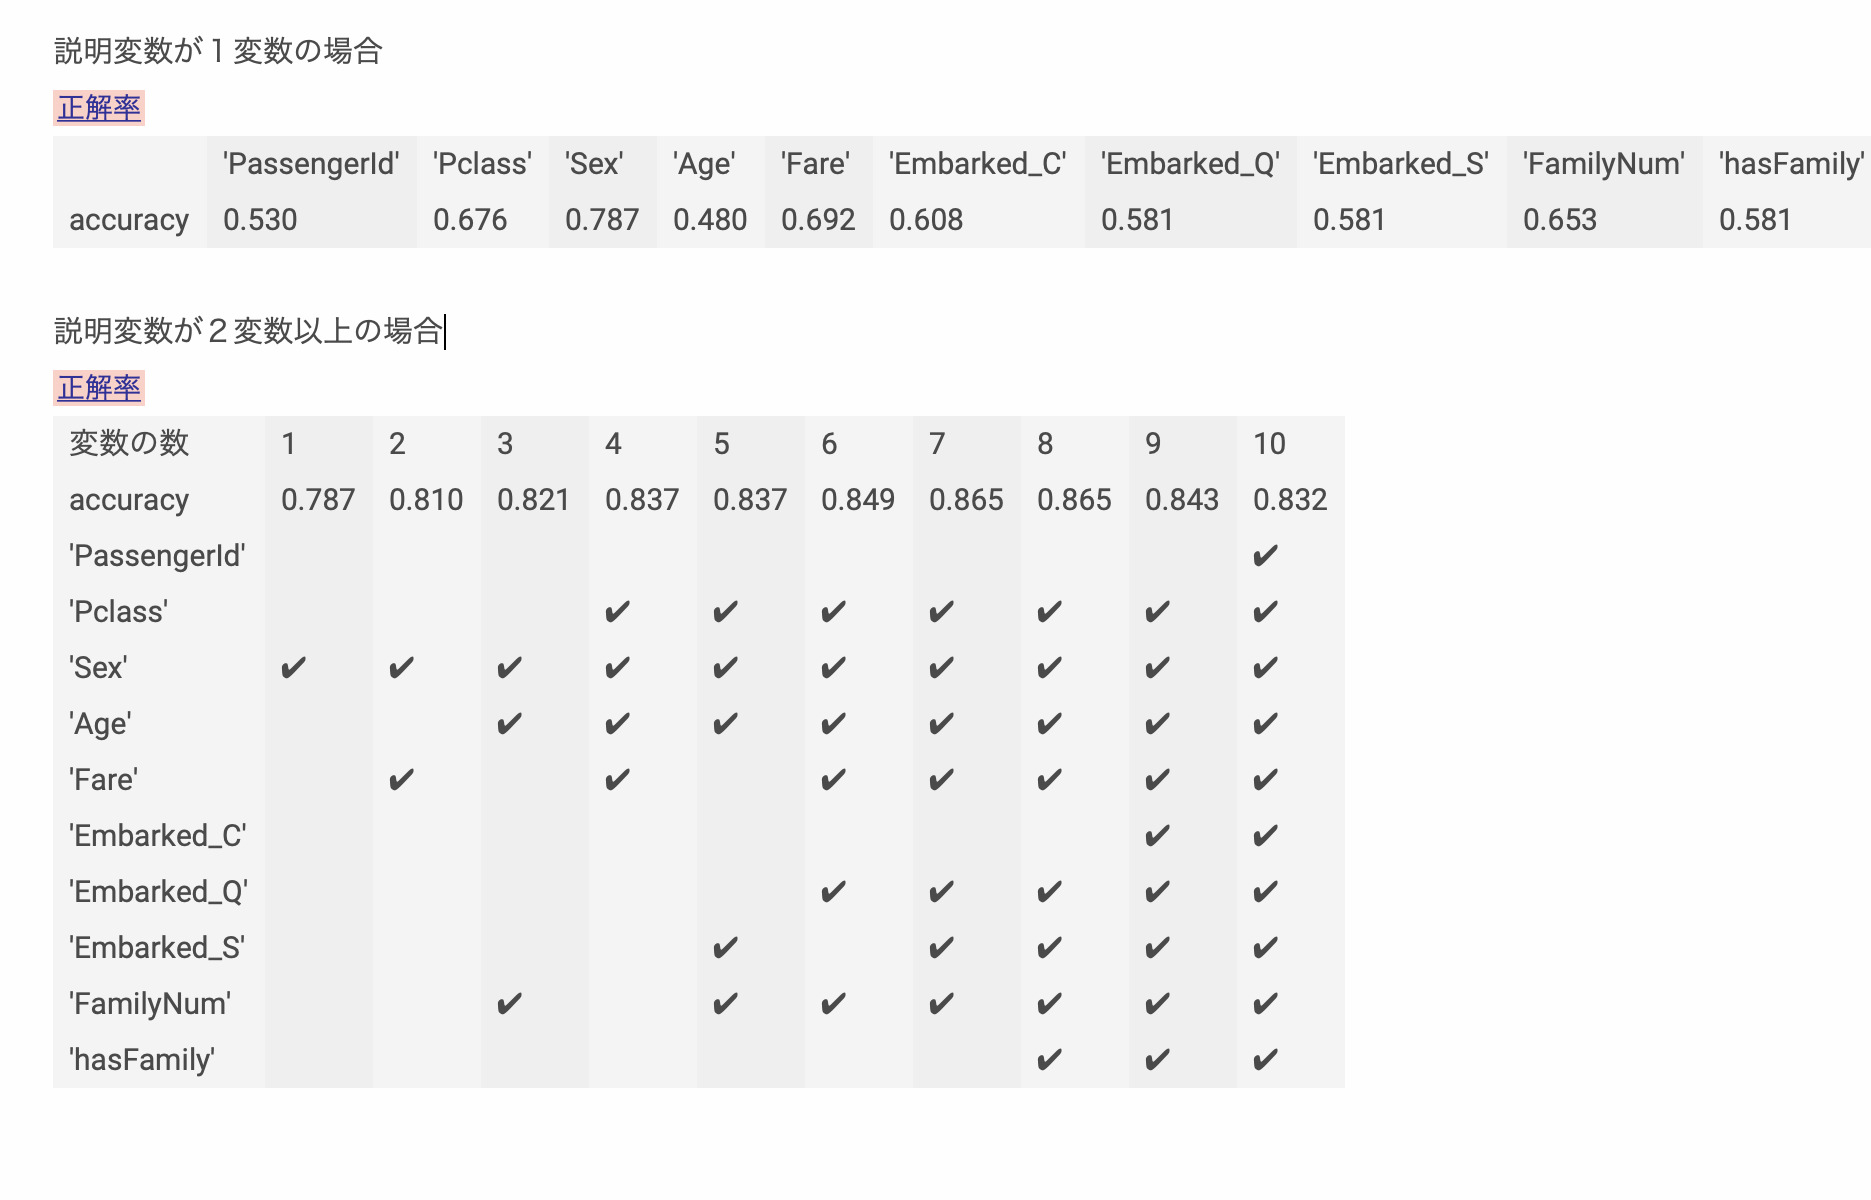

In [ ]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('LightGBM_正解率.jpg'))